In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
sys.path.append("/public/netease/jupyter-maskrcnn/Mask_RCNN-master/coco/PythonAPI")
from config import Config
import utils
import visualize
import config
import coco_data_input
import mrcnn

config= config.Config()
config.IMAGES_PER_GPU=1
COCO_DIR = "./data2014"

print(config.NAME)
if config.NAME == "coco":
    dataset_val = coco_data_input.CocoDataset()
    dataset_val.load_coco(COCO_DIR, "val", year=2014)
    dataset_val.prepare()
    print("***************** load train dataset succeed!")
#image_ids表示一个list，里面包含了所有2014数据集的id
print("Image Count of dataset_val : {}".format(len(dataset_val.image_ids)))
print("Class Count of data_val: {}".format(dataset_val.num_classes))
# for i, info in enumerate(dataset_val.class_info):
#     print("{:3}. {:50}".format(i, info['name']))

/home/liqi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/liqi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


coco
loading annotations into memory...
Done (t=4.25s)
creating index...
index created!
***************** load train dataset succeed!
Image Count of dataset_val : 40137
Class Count of data_val: 81


In [2]:
class InferenceConfig(config.__class__):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
inference_config = InferenceConfig()

In [3]:
liqi = mrcnn.MaskRCNN(model_dir=None, config=inference_config)
liqi.mode = 'inference'
dataprepare = liqi.loadweight()

conv1/w:0 (7, 7, 3, 64)
conv1/b:0 (64,)
conv1_1/conv1_1/beta:0
res2a_branch2a/w:0 (1, 1, 64, 64)
res2a_branch2a/b:0 (64,)
bn2a_branch2a/bn2a_branch2a/beta:0
res2a_branch2b/w:0 (3, 3, 64, 64)
res2a_branch2b/b:0 (64,)
bn2a_branch2b/bn2a_branch2b/beta:0
res2a_branch2c/w:0 (1, 1, 64, 256)
res2a_branch2c/b:0 (256,)
bn2a_branch2c/bn2a_branch2c/beta:0
res2a_branch1/w:0 (1, 1, 64, 256)
res2a_branch1/b:0 (256,)
bn2a_branch1/bn2a_branch1/beta:0
res2b_branch2a/w:0 (1, 1, 256, 64)
res2b_branch2a/b:0 (64,)
bn2b_branch2a/bn2b_branch2a/beta:0
res2b_branch2b/w:0 (3, 3, 64, 64)
res2b_branch2b/b:0 (64,)
bn2b_branch2b/bn2b_branch2b/beta:0
res2b_branch2c/w:0 (1, 1, 64, 256)
res2b_branch2c/b:0 (256,)
bn2b_branch2c/bn2b_branch2c/beta:0
res2c_branch2a/w:0 (1, 1, 256, 64)
res2c_branch2a/b:0 (64,)
bn2c_branch2a/bn2c_branch2a/beta:0
res2c_branch2b/w:0 (3, 3, 64, 64)
res2c_branch2b/b:0 (64,)
bn2c_branch2b/bn2c_branch2b/beta:0
res2c_branch2c/w:0 (1, 1, 64, 256)
res2c_branch2c/b:0 (256,)
bn2c_branch2c/bn2c_branch2

res5a_branch2a/w:0 (1, 1, 1024, 512)
res5a_branch2a/b:0 (512,)
bn5a_branch2a/bn5a_branch2a/beta:0
res5a_branch2b/w:0 (3, 3, 512, 512)
res5a_branch2b/b:0 (512,)
bn5a_branch2b/bn5a_branch2b/beta:0
res5a_branch2c/w:0 (1, 1, 512, 2048)
res5a_branch2c/b:0 (2048,)
bn5a_branch2c/bn5a_branch2c/beta:0
res5a_branch1/w:0 (1, 1, 1024, 2048)
res5a_branch1/b:0 (2048,)
bn5a_branch1/bn5a_branch1/beta:0
res5b_branch2a/w:0 (1, 1, 2048, 512)
res5b_branch2a/b:0 (512,)
bn5b_branch2a/bn5b_branch2a/beta:0
res5b_branch2b/w:0 (3, 3, 512, 512)
res5b_branch2b/b:0 (512,)
bn5b_branch2b/bn5b_branch2b/beta:0
res5b_branch2c/w:0 (1, 1, 512, 2048)
res5b_branch2c/b:0 (2048,)
bn5b_branch2c/bn5b_branch2c/beta:0
res5c_branch2a/w:0 (1, 1, 2048, 512)
res5c_branch2a/b:0 (512,)
bn5c_branch2a/bn5c_branch2a/beta:0
res5c_branch2b/w:0 (3, 3, 512, 512)
res5c_branch2b/b:0 (512,)
bn5c_branch2b/bn5c_branch2b/beta:0
res5c_branch2c/w:0 (1, 1, 512, 2048)
res5c_branch2c/b:0 (2048,)
bn5c_branch2c/bn5c_branch2c/beta:0
fpn_c5p5/w:0 (1, 1, 20

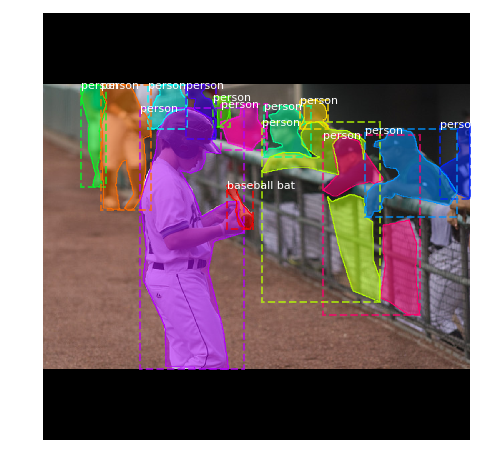

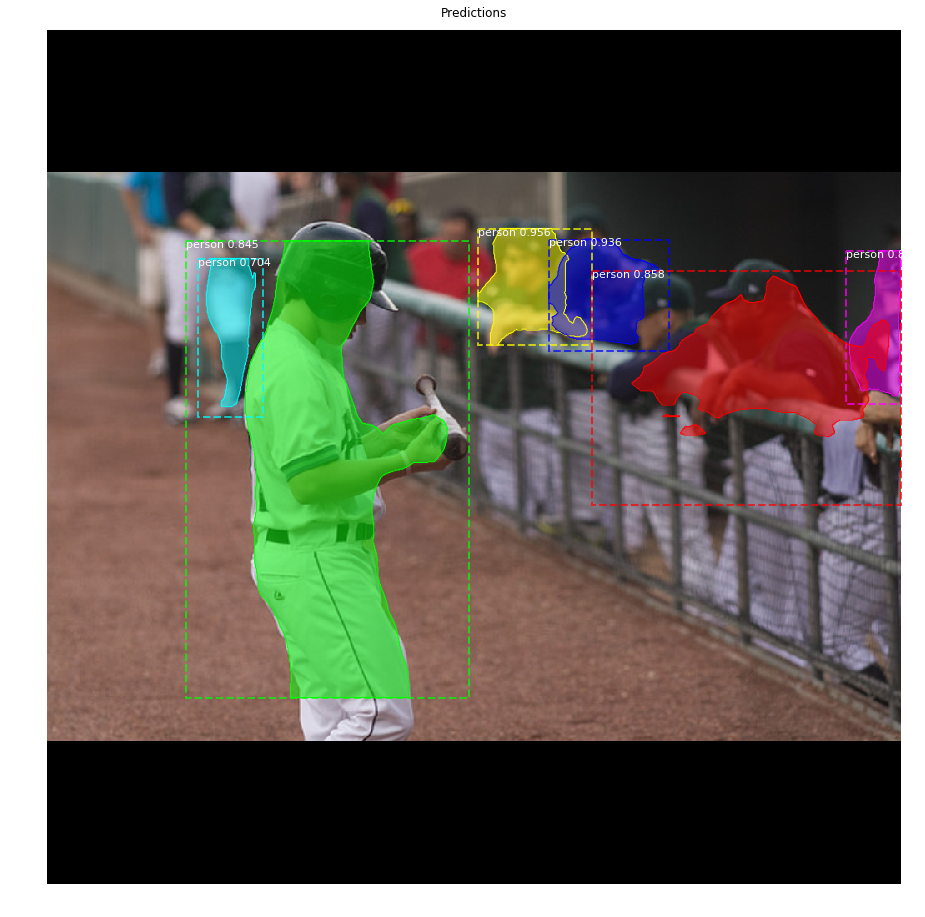

In [9]:
image_id = 411
original_image, image_meta, class_ids, gt_bbox, gt_mask =\
    coco_data_input.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)
visualize.display_instances(original_image, gt_bbox, gt_mask, class_ids, 
                            dataset_val.class_names, figsize=(8, 8))
r = liqi.detect([original_image], dataprepare=[dataprepare[0], dataprepare[1][0], dataprepare[1][1]], sess=dataprepare[2])[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'],
                            title="Predictions")

In [3]:
import pickle as pkl
liqi = mrcnn.MaskRCNN(model_dir=None, config=inference_config)
liqi.mode = 'inference'
liqi.pretrain_model = pkl.load(open("./evaluate/last.pkl", 'rb'))
dataprepare = liqi.loaddata()
import tensorflow as tf
sess = tf.Session()

25053


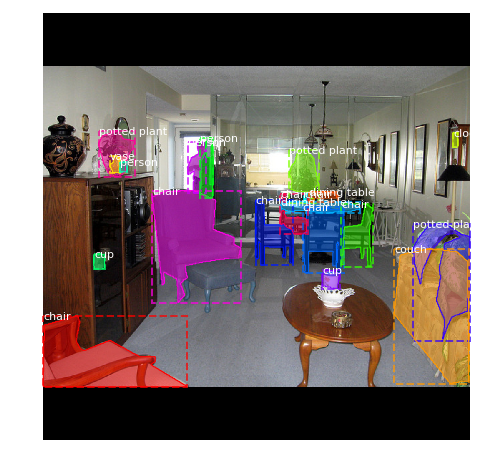

4


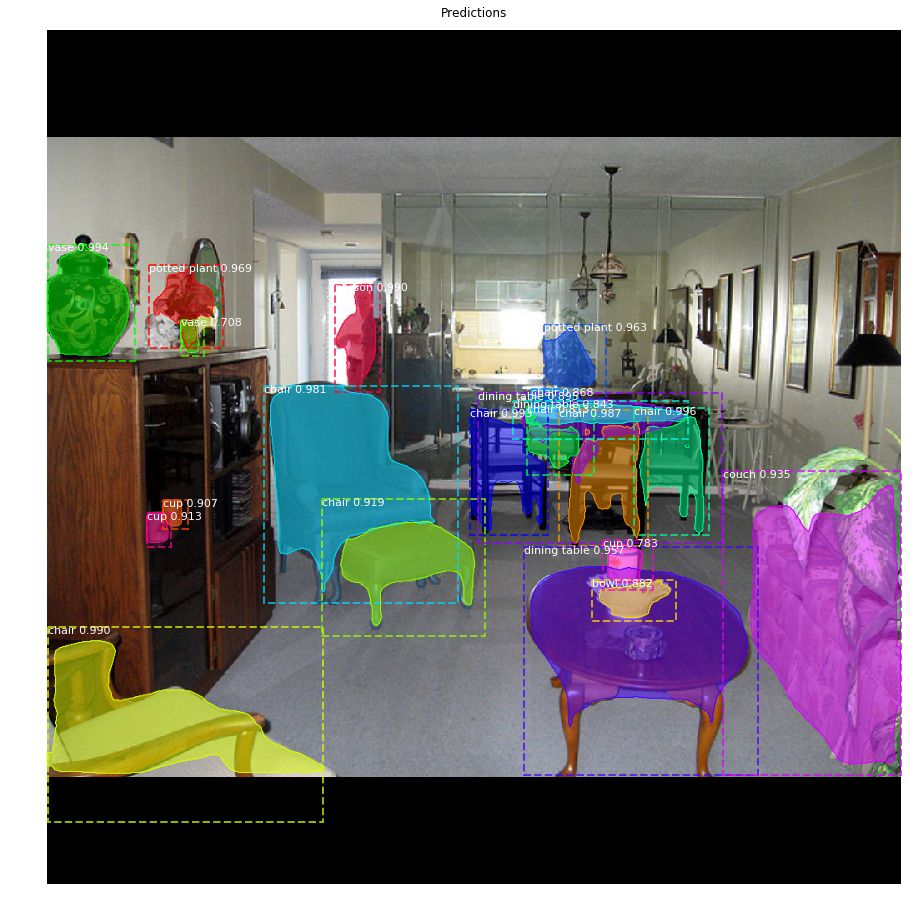

In [12]:
image_id = random.choice(dataset_val.image_ids)
print(image_id)
original_image, image_meta, class_ids, gt_bbox, gt_mask =\
    coco_data_input.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)
visualize.display_instances(original_image, gt_bbox, gt_mask, class_ids, 
                            dataset_val.class_names, figsize=(8, 8))
r = liqi.detect([original_image], dataprepare=dataprepare, sess=sess)[0]
print(len(r))
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'],
                            title="Predictions")